<a href="https://colab.research.google.com/github/sudhathangaraj99/KMeans-Clustering-Project/blob/main/KMeans_Clustering_from_Scratch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`KMeans Clustering `**

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs   #Synthetic dataset generated using make_blobs for clustering evaluation
from sklearn.metrics import silhouette_score


**1.DATA GENERATION**

*   Synthetic dataset
*   500 samples
*   3 well-seperated clusters
*   2 features for 2D Visualization




In [2]:
X, y_true = make_blobs(
    n_samples = 500,
    centers = 3,
    n_features = 2,
    cluster_std = 1.2, #Cluster spread controlled using cluster_std parameter
    random_state=42
)
# Feature scaling was not applied as synthetic data had comparable feature ranges

2.**K-MEANS FROM SCRATCH(NUMPY ONLY)**


  KMeans does 4 actions repeatedly:

*   Pick K random centers
*   Assign each point to the nearest center
*   Move the centers to the middle of their points
*   Repeat until nothing changes





In [6]:
#distance function

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

#KMeans implementation

def kmeans(X, K, max_iters=100):
  n_samples, n_features = X.shape

  centroids = X[np.random.choice(n_samples, K, replace=False)]  #Random initilization of centroids


  for _ in range(max_iters):
      labels = np.array([
               np.argmin([euclidean_distance(x,c) for c in centroids])
               for x in X
                         ]) #Assignment step (Euclidean distance computed using NumPy linear algebra utilities”)


      new_centroids = np.array([
                      X[labels == k].mean(axis=0) for k in range (K)
                      ])  #update the step


      if np.all(centroids == new_centroids):  #convergence check
        break

      centroids = new_centroids

  return centroids, labels


#WSS Calculation
def compute_wss(X, labels, centroids):
    wss=0
    for k in range(len(centroids)):
      cluster_points = X[labels == k]
      wss += np.sum((cluster_points - centroids[k])** 2)
    return wss



**3. Find optimal K(2 to 10)**

In [10]:
wss_values =[]
silhouette_values = []

K_range = range(2,11)

for K in K_range:
  centroids, labels = kmeans(X, K)
  wss = compute_wss(X, labels, centroids)
  wss_values.append(wss)


  silhouette_values.append(silhouette_score(X, labels))


**4. VISUALIZATION**

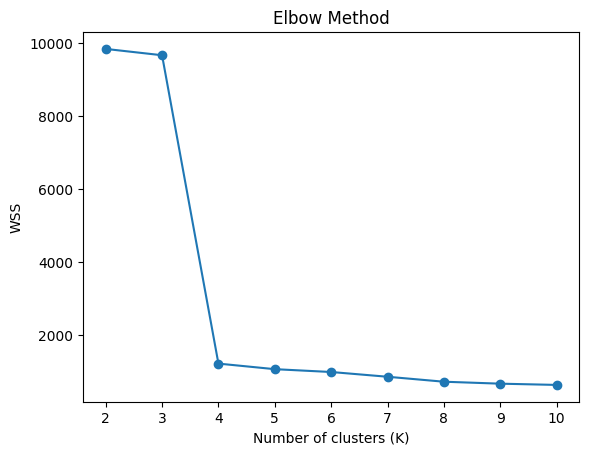

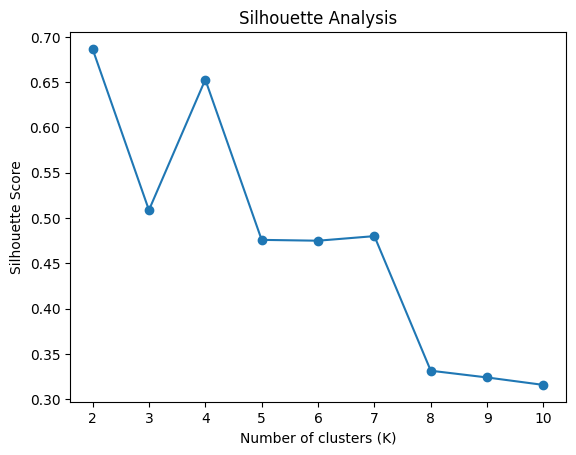

In [12]:
plt.figure()
plt.plot(K_range, wss_values, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WSS")
plt.title("Elbow Method")
plt.show()



plt.figure()
plt.plot(K_range, silhouette_values, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()





**5. Final clustering with optimal K**

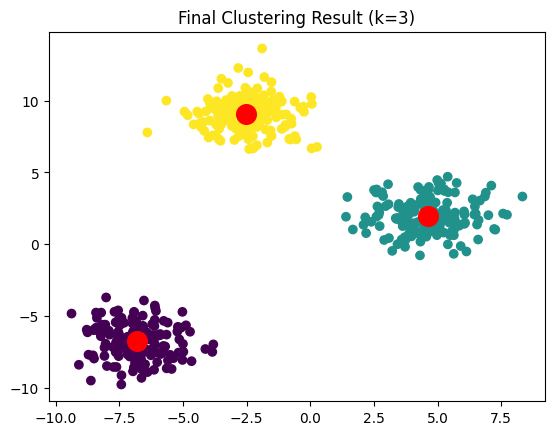

In [14]:
optimal_k = 3
centroids, labels = kmeans(X, optimal_k)


plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', color= "red", s=200)
plt.title("Final Clustering Result (k=3)")
plt.show()